<h1 align="center"> Principle Component Analysis (PCA) for Data Visualization </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Iris Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [57]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
npm_packages=pd.read_csv('../saner2018/csv/npm_packages_jan_final.csv', sep=';', dtype=object, index_col='name')
librariesio=npm_packages.loc[:,['depPro','depRepo','communityInterest','dependentsCount','downloadsCount','downloadsAcceleration']]

In [20]:
npm_packages.head()

,tests,carefulness,health,branding,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration,releasesFrequency,commitsFrequency,openIssues,issuesDistribution,depPro,depRepo,releases,lastRelease,dependencies,firstRelease,size
name,,,,,,,,,,,,,,,,,,,
007,0.85,0.165,1,0,24,0,190.666666667,0.658904109589,0,0,0.777777777778,0,1.0,1.0,3.0,1628.0,0.0,1631.0,75.2
1,0.2265,0.42,0.5,0,17,1,276.333333333,0.202625570776,0.0616438356164,0,0.916666666667,0,3.0,298.0,8.0,1375.0,5.0,1820.0,31.3
101,1,1.0,0.5,0.6,1634,87,22274,-101.022469559,0,0.0640068493151,1,0.00506781015803,103.0,152.0,42.0,509.0,3.0,1372.0,569.0
10er10,0,0.065,0,0,87,0,22,0.0367579908676,0,0.115068493151,0.873563218391,0,0.0,0.0,1.0,1550.0,11.0,1550.0,18534.4
127-ssh,0,0.165,1,0,3,0,51,0.2774543379,0,0,0.7,0.7,0.0,0.0,3.0,1476.0,0.0,1481.0,121.0


## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [8]:
y = df.loc[:,['target']].values

In [61]:
features=librariesio.columns
x = StandardScaler().fit_transform(x)
librariesio = StandardScaler().fit_transform(librariesio)

In [62]:
pd.DataFrame(data = librariesio, columns = features).head()

,depPro,depRepo,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration
0,-0.029922,-0.055906,-0.079287,-0.032244,-0.059849,-0.054394
1,-0.025777,0.031731,-0.082773,-0.026039,-0.059736,-0.054621
2,0.181459,-0.011350,0.722343,0.507583,-0.030546,-0.104941
3,-0.031994,-0.056201,-0.047919,-0.032244,-0.060073,-0.054703
4,-0.031994,-0.056201,-0.089743,-0.032244,-0.060035,-0.054583


## PCA Projection to 2D

In [63]:
pca = PCA(n_components=6)

In [64]:
principalComponents = pca.fit_transform(librariesio)

In [65]:
pca.explained_variance_ratio_.sum()

1.0

In [66]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = [features])

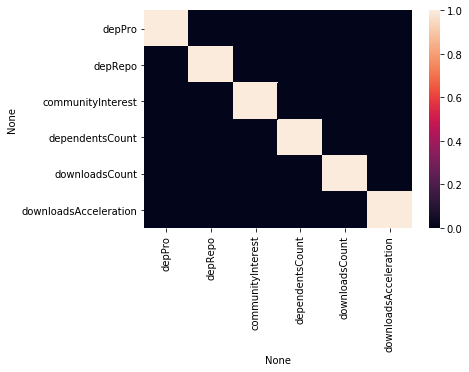

In [69]:
import seaborn as sns
sns.heatmap(principalDf.corr())

In [39]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [40]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

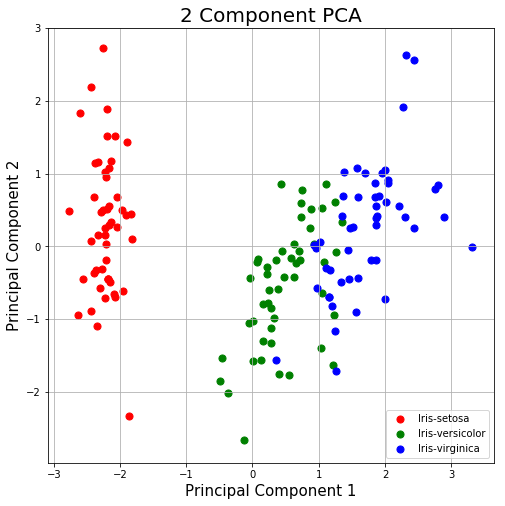

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The three classes appear to be well separated! 

iris-virginica and iris-versicolor could be better separated, but still good!

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [42]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. 

## What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (<b>most common application in my opinion</b>). We will see this in the MNIST dataset. 

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

## What are the limitations of PCA? 

- PCA is not scale invariant. check: we need to scale our data first. 
- The directions with largest variance are assumed to be of the most interest 
- Only considers orthogonal transformations (rotations) of the original variables 
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not. 
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances. 